In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

plt.style.use("dark_background")

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

X[:2], y[:2], target_names

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2]]),
 array([0, 0]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [3]:
# Standardize the data
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X_std[:2]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ]])

In [4]:
# Covariance matrix
cov_mat = np.cov(X_std, rowvar=False)
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [5]:
# Eigen decomposition
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

# Sort eigenvalues & eigenvectors (descending order)
sorted_idx = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_idx]
eigen_vectors = eigen_vectors[:, sorted_idx]

eigen_values, eigen_vectors

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[-0.52106591,  0.37741762,  0.71956635,  0.26128628],
        [ 0.26934744,  0.92329566, -0.24438178, -0.12350962],
        [-0.5804131 ,  0.02449161, -0.14212637, -0.80144925],
        [-0.56485654,  0.06694199, -0.63427274,  0.52359713]]))

In [6]:
# Explained variance
explained_variance_ratio = eigen_values / np.sum(eigen_values)
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Eigenvalues:", eigen_values)
print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Variance:", cumulative_variance)

Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]
Explained Variance Ratio: [0.72962445 0.22850762 0.03668922 0.00517871]
Cumulative Variance: [0.72962445 0.95813207 0.99482129 1.        ]


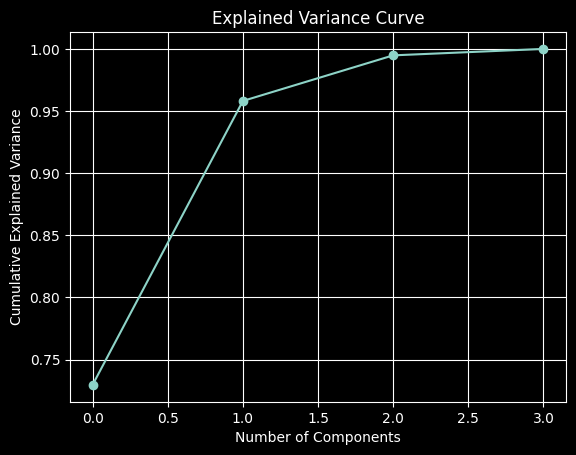

In [7]:
# Plot cumulative explained variance
plt.plot(cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance Curve")
plt.grid()
plt.show()

In [8]:
# Project data to 2D (take top 2 eigenvectors)
W = eigen_vectors[:, :2]
X_pca = X_std @ W

X_pca[:2]

array([[ 2.26470281,  0.4800266 ],
       [ 2.08096115, -0.67413356]])

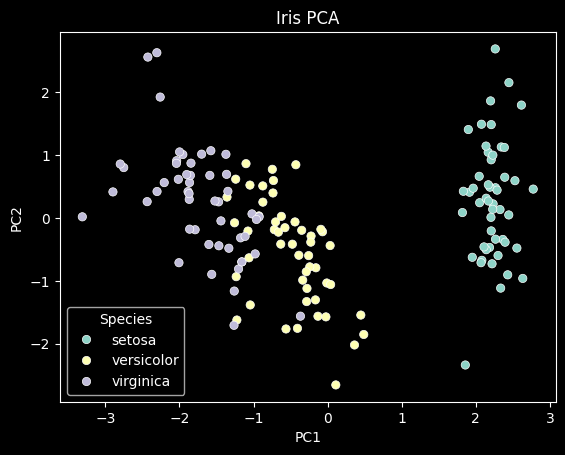

In [9]:
species_names = np.array([iris.target_names[i] for i in y])

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=species_names)
plt.title("Iris PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Species")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
X_pca_train, X_pca_test, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=99)

# Decision Tree on original data
clf = DecisionTreeClassifier(random_state=99)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Decision Tree on PCA-reduced data
clf_pca = DecisionTreeClassifier(random_state=99)
clf_pca.fit(X_pca_train, y_train)
y_pred_pca = clf_pca.predict(X_pca_test)

# Evaluation
print("Original Data:")
print("  Accuracy :", accuracy_score(y_test, y_pred))
print("  Precision:", precision_score(y_test, y_pred, average="macro"))

print("\nPCA-Reduced Data:")
print("  Accuracy :", accuracy_score(y_test, y_pred_pca))
print("  Precision:", precision_score(y_test, y_pred_pca, average="macro"))

Original Data:
  Accuracy : 0.9333333333333333
  Precision: 0.9388888888888888

PCA-Reduced Data:
  Accuracy : 0.9
  Precision: 0.9116809116809117
